In [209]:
#Load packages
import pandas as pd
import numpy as np
from mplsoccer import Pitch, Sbopen
from statsbombpy import sb
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

In [211]:
# Select match_ids
df = sb.matches(competition_id=55, season_id=282)
df = df[((df['home_team'] == 'Spain')|(df['away_team'] == 'Spain')) & (df['competition_stage'] != 'Group Stage')]
spain_ids = df['match_id'].tolist()

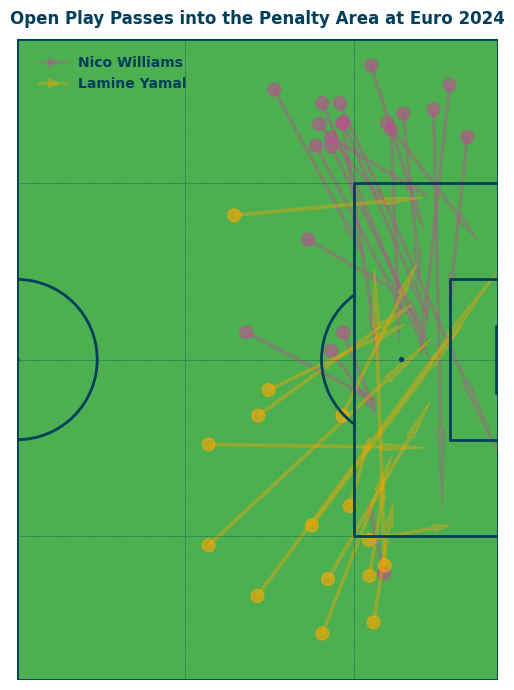

In [219]:
# Set up parser and storage
parser = Sbopen()
all_passes = []

# Load and filter all passes ending in the penalty area
for match_id in spain_ids:
    df, _, _, _ = parser.event(match_id)
    
    passes = df[
        (df['type_name'] == 'Pass') &
        (df['sub_type_name'] != 'Throw-in') &
        (df['sub_type_name'] != 'Free Kick') &
        (df['sub_type_name'] != 'Corner') &
        # (df['outcome_name'].isna()) &
        (df['end_x'] >= 102) & 
        (df['end_y'] >= 18) & (df['end_y'] <= 62) &
        # Start outside penalty area
    ~((df['x'] >= 102) & (df['y'] >= 18) & (df['y'] <= 62))
    
    ].set_index('id')
    
    all_passes.append(passes)

# Combine all matches
combined_passes = pd.concat(all_passes)

pitch = Pitch(
    pitch_type='statsbomb', 
    line_color="#003f5c", 
    pitch_length=120, pitch_width=80,
    half=False, 
    pitch_color=None,  # Remove green fill from here
    line_zorder=2,
    axis=False, label=False
)
fig, ax = pitch.draw(figsize=(10,7))



# Add feint vertical lines
for x in [81, 102, 123]:
    ax.axvline(x, color='#003f5c', linestyle='--', linewidth=0.4, alpha=0.4)

# Add feint horizontal lines
for y in [18, 40, 62]:
    ax.axhline(y, color='#003f5c', linestyle='--', linewidth=0.4, alpha=0.4)

# Filter & plot Nicholas Williams' passes
nick_passes = combined_passes[combined_passes['player_name'] == 'Nicholas Williams Arthuer']
for _, thepass in nick_passes.iterrows():
    x, y = thepass['x'], thepass['y']
    dx, dy = thepass['end_x'] - x, thepass['end_y'] - y
    ax.add_patch(plt.Circle((x, y), 0.8, color="#bc5090", alpha=0.6))
    ax.add_patch(plt.Arrow(x, y, dx, dy, width=1.5, color="#bc5090", alpha=0.3))

# Filter & plot Lamine Yamal's passes
lamine_passes = combined_passes[combined_passes['player_name'] == 'Lamine Yamal Nasraoui Ebana']
for _, thepass in lamine_passes.iterrows():
    x, y = thepass['x'], thepass['y']
    dx, dy = thepass['end_x'] - x, thepass['end_y'] - y
    ax.add_patch(plt.Circle((x, y), 0.8, color="#ffa600", alpha=0.6))
    ax.add_patch(plt.Arrow(x, y, dx, dy, width=1.5, color="#ffa600", alpha=0.3))

# Set hard limits to clip view to just the pitch
ax.set_xlim(60, 120)
ax.set_ylim(0, 80)
ax.invert_yaxis()

# Replace axvline / axhline with:
for x in [81, 102]:
    ax.plot([x, x], [0, 80], color='#003f5c', linestyle='--', linewidth=0.4, alpha=0.4)

for y in [18, 40, 62]:
    ax.plot([60, 120], [y, y], color='#003f5c', linestyle='--', linewidth=0.4, alpha=0.4)

# Create legend elements with arrow style
legend_elements = [
    Line2D([0], [0], color="#bc5090", lw=2.5, alpha=0.3, marker='>',
           markersize=7, label='Nico Williams'),
    Line2D([0], [0], color="#ffa600", lw=2.5, alpha=0.3, marker='>',
           markersize=7, label='Lamine Yamal')
]

# Add legend
legend = ax.legend(
    handles=legend_elements,
    loc='lower left',
    bbox_to_anchor=(0.02, 0.9),
    fontsize=10,
    frameon=False
)

# Match legend font color and style to rest of graphic
for text in legend.get_texts():
    text.set_color("#003f5c")
    text.set_fontfamily("DejaVu Sans")  # Or another font to match your visuals
    text.set_fontsize(10)
    text.set_fontweight('bold')  # Make legend font bold

plt.title(
    "Open Play Passes into the Penalty Area at Euro 2024",
    fontsize=12,  # You can increase the font size for the title
    fontweight='bold',  # Make the title bold
    color='#003f5c',  # Match the color
    ha='center',  # Horizontal alignment
    va='bottom',  # Vertical alignment
    pad=8,  # Optional: Adjust the padding between the title and the plot
    zorder=10,  # To ensure it's on top of other elements
)

# Add a grass green rectangle manually to match the full pitch dimensions
grass_green = '#4CAF50'  # You can also try '#4CAF50' or '#5DAE4E' for variety
ax.add_patch(Rectangle(
    (60, 0), 60, 80,  # Full StatsBomb pitch size
    facecolor=grass_green,
    zorder=0  # Behind everything else
))


plt.show()
